This project works on generating and visualizing data using Python libraries.

Data download succesful.

Preview of the data:
   Index   Height(Inches)"   "Weight(Pounds)"
0      1             65.78             112.99
1      2             71.52             136.49
2      3             69.40             153.03
3      4             68.22             142.34
4      5             67.79             144.30

Proceed columns:
Index(['Index', ' Height(Inches)"', ' "Weight(Pounds)"'], dtype='object')

Data after cleaning
   Index   Height(Inches)"   "Weight(Pounds)"
0      1             65.78             112.99
1      2             71.52             136.49
2      3             69.40             153.03
3      4             68.22             142.34
4      5             67.79             144.30


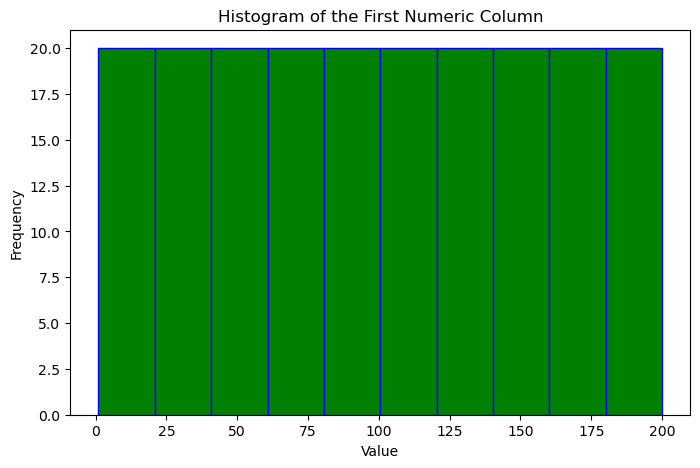

In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Defining the URL to download data
data_url ='https://people.sc.fsu.edu/~jburkardt/data/csv/hw_200.csv'
#Downloading the data
response = requests.get(data_url)
if response.status_code ==200:
    print('Data download succesful.')
    #save the content to a loal csv file 
    with open("data.csv","wb") as file:
        file.write(response.content)
else:
    print(f"Failed to download data. HTTP Status Code:{response.status_code}")
    exit()

#Read the downloaded CSV file into the pandas DataFrame
data = pd.read_csv("data.csv")
print("\nPreview of the data:")
print(data.head())

#check for missing values
def check_missing_values(df):
    missing_values = df.isnull().sum()
    print("\nMissing values in the dataset:")
    print(missing_values)

def rename_columns(df):
    df.columns = df.columns.str.strip().str.replace('','_').str.lower()

print('\nProceed columns:')
print(data.columns)

#Data Cleaning
def clean_data(df):
    df.drop_duplicates(inplace=True)
    print('\nData after cleaning')
    print(df.head())

clean_data(data)

plt.figure(figsize=(8, 5))
plt.hist(data.iloc[:, 0], bins=10, color='green', edgecolor='blue')
plt.title('Histogram of the First Numeric Column')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()